In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'F:\day-nigh\Train'
valid_path = 'F:\day-nigh\Test'

In [4]:

# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('F:\day-nigh\Train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('F:\day-nigh\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 946 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory('F:\day-nigh\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 210 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
h = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
30/30 [==============================] - 112s 4s/step - loss: 4.3499 - accuracy: 0.4619 - val_loss: 5.3458 - val_accuracy: 0.5524
Epoch 2/20
30/30 [==============================] - 113s 4s/step - loss: 3.7802 - accuracy: 0.5507 - val_loss: 2.4984 - val_accuracy: 0.5619
Epoch 3/20
30/30 [==============================] - 114s 4s/step - loss: 2.7337 - accuracy: 0.4778 - val_loss: 2.0871 - val_accuracy: 0.6000
Epoch 4/20
30/30 [==============================] - 113s 4s/step - loss: 2.3672 - accuracy: 0.5053 - val_loss: 2.6884 - val_accuracy: 0.6476
Epoch 5/20
30/30 [==============================] - 112s 4s/step - loss: 2.1071 - accuracy: 0.5021 - val_loss: 2.4375 - val_accuracy: 0.5429
Epoch 6/20
30/30 [==============================] - 111s 4s/step - loss: 1.9822 - accuracy: 0.5243 - val_loss: 1.8660 - val_accuracy: 0.4286
Epoch 7/20
30/30 [==============================] - 112s 4s/step - loss: 2.682

In [18]:
import matplotlib.pyplot as plt


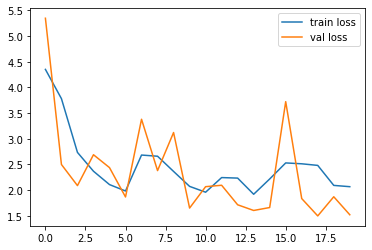

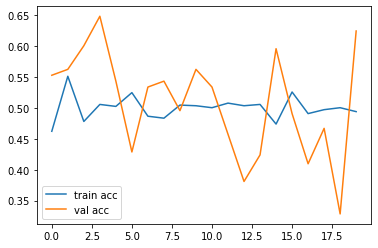

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(h.history['accuracy'], label='train acc')
plt.plot(h.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [23]:
y_pred = model.predict(test_set)
y_pred


array([[3.66519719e-01, 6.33480310e-01],
       [8.49097408e-03, 9.91509080e-01],
       [1.46669848e-03, 9.98533249e-01],
       [6.68175399e-01, 3.31824601e-01],
       [2.05325991e-01, 7.94673979e-01],
       [6.19698651e-02, 9.38030064e-01],
       [1.66444154e-03, 9.98335540e-01],
       [3.84999184e-05, 9.99961495e-01],
       [1.35730803e-01, 8.64269197e-01],
       [9.60153222e-01, 3.98468040e-02],
       [2.33532280e-01, 7.66467690e-01],
       [4.08619672e-01, 5.91380298e-01],
       [3.67985070e-02, 9.63201463e-01],
       [4.58411902e-01, 5.41588068e-01],
       [2.12035999e-02, 9.78796363e-01],
       [6.82186633e-02, 9.31781292e-01],
       [2.08654985e-01, 7.91344941e-01],
       [8.29719193e-03, 9.91702855e-01],
       [5.23683071e-01, 4.76316869e-01],
       [2.94159621e-01, 7.05840409e-01],
       [3.06048687e-03, 9.96939540e-01],
       [8.88699889e-02, 9.11130011e-01],
       [2.45095138e-02, 9.75490570e-01],
       [1.02317609e-01, 8.97682428e-01],
       [9.934480

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)